In [382]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

### About the dataset

This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### Loading the dataset

In [383]:
loan_df = pd.read_csv('loan_train.csv')
loan_df.head(5)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [384]:
loan_df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


In [385]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      346 non-null    int64 
 1   Unnamed: 0.1    346 non-null    int64 
 2   loan_status     346 non-null    object
 3   Principal       346 non-null    int64 
 4   terms           346 non-null    int64 
 5   effective_date  346 non-null    object
 6   due_date        346 non-null    object
 7   age             346 non-null    int64 
 8   education       346 non-null    object
 9   Gender          346 non-null    object
dtypes: int64(5), object(5)
memory usage: 27.2+ KB


### Exploratory Data Analysis

The dataframe columns <strong>Unnamed: 0</strong> and <strong>Unnamed 0.1</strong> aren't listed in the dataset's description. And they both seem to be index columns although not useful since it skips the number 1.

In [386]:
loan_df = loan_df.drop(['Unnamed: 0'], axis=1)
loan_df = loan_df.drop(['Unnamed: 0.1'], axis=1)
loan_df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


Now that the dataset is loaded and all relevant columns are in place, we can start exploring the data. We will first check for null values in the dataset. Plotting a Seaborn barplot with the count of missing values in each column shows that we have no missing values in the dataset.

<AxesSubplot:>

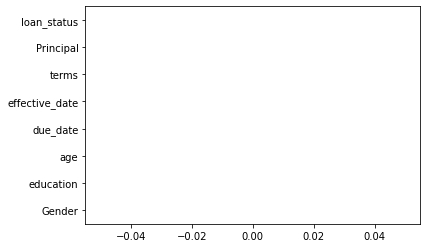

In [387]:
sns.barplot(x=loan_df.isna().sum(), y=loan_df.columns)

Next, we plot a Seaborn heatmap to visualize the correlation between the columns with quantitative values.

<AxesSubplot:>

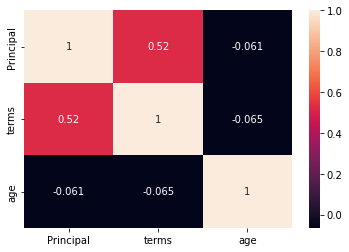

In [388]:
sns.heatmap(loan_df.corr(), annot=True)

First we lowercase values and columns where it applies to have a consistent set of data. Then we proceed to hot encode the categorical columns in the dataset

In [389]:
loan_df.columns = loan_df.columns.str.lower()

for col in loan_df.columns:
    if loan_df[col].dtype == 'object':
        loan_df[col] = loan_df[col].str.lower()

loan_df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender
0,paidoff,1000,30,9/8/2016,10/7/2016,45,high school or below,male
1,paidoff,1000,30,9/8/2016,10/7/2016,33,bechalor,female
2,paidoff,1000,15,9/8/2016,9/22/2016,27,college,male
3,paidoff,1000,30,9/9/2016,10/8/2016,28,college,female
4,paidoff,1000,30,9/9/2016,10/8/2016,29,college,male


In [390]:
encoder = OneHotEncoder()
encode_df = pd.DataFrame(
    data=encoder.fit_transform(
        loan_df[['loan_status','education','gender']]).toarray(),
        columns=encoder.get_feature_names(['loan_status','education','gender']))
        
loan_df = loan_df.join(encode_df)
loan_df.head()

,loan_status,principal,terms,effective_date,due_date,age,education,gender,loan_status_collection,loan_status_paidoff,education_bechalor,education_college,education_high school or below,education_master or above,gender_female,gender_male
0,paidoff,1000,30,9/8/2016,10/7/2016,45,high school or below,male,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,paidoff,1000,30,9/8/2016,10/7/2016,33,bechalor,female,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,paidoff,1000,15,9/8/2016,9/22/2016,27,college,male,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,paidoff,1000,30,9/9/2016,10/8/2016,28,college,female,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,paidoff,1000,30,9/9/2016,10/8/2016,29,college,male,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
